In [1]:
from functions_image import *
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
image_url = 'https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1568668356i/49977811.jpg'
image_urls = []
pixels, pixels_sample, original_shape, image = get_info_from_image(image_url)

Reddest pixel:(281, 61)
Greenest pixel:(117, 144)
Bluest pixel:(105, 144)


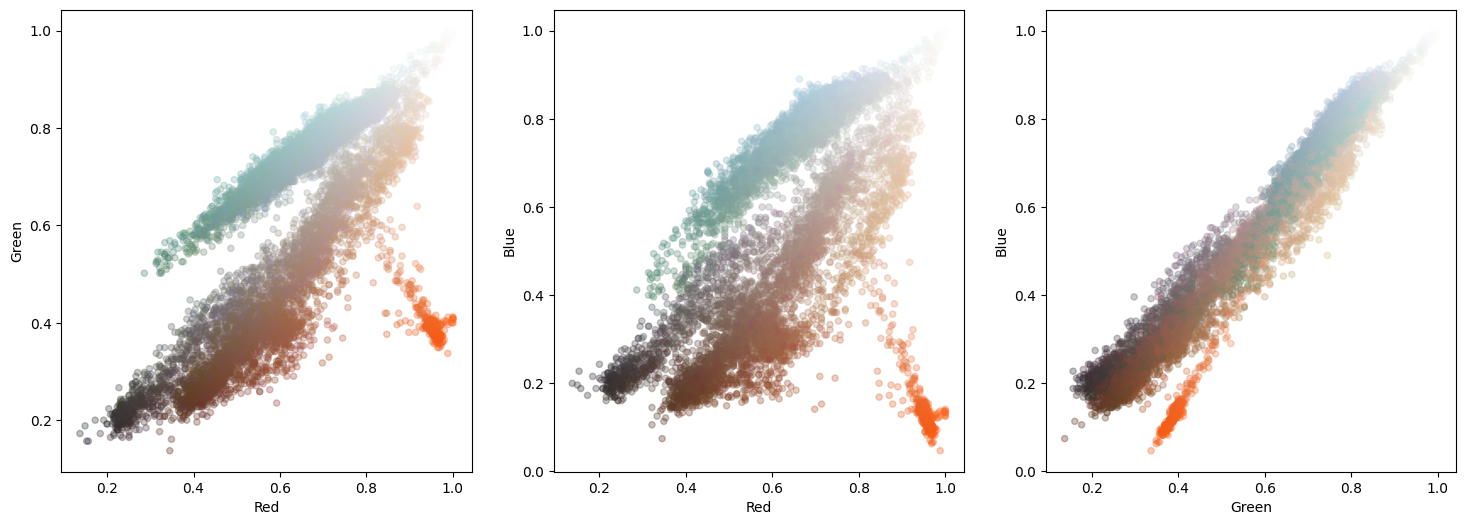

In [3]:
plot_colours(pixels_sample, 'Red', 'Green', 'Blue')

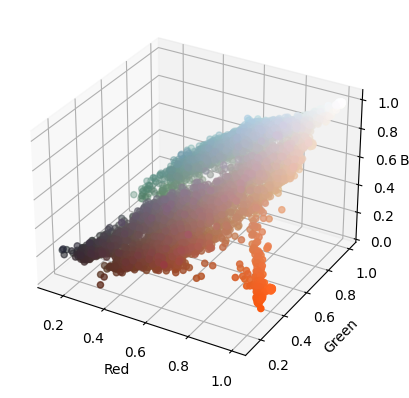

In [4]:
plot_colours_3D(pixels_sample, 'Red', 'Green', 'Blue')

In [5]:
pixels.corr(numeric_only=True)

,Red,Green,Blue
Red,1.000000,0.651556,0.493143
Green,0.651556,1.000000,0.971126
Blue,0.493143,0.971126,1.000000


In [6]:
clusters, labels = get_clusters_from_pixels(pixels, pixels_sample)

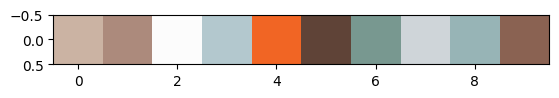

In [7]:
plt.imshow([clusters])

In [8]:
print(labels)

[7 7 3 ... 6 6 6]


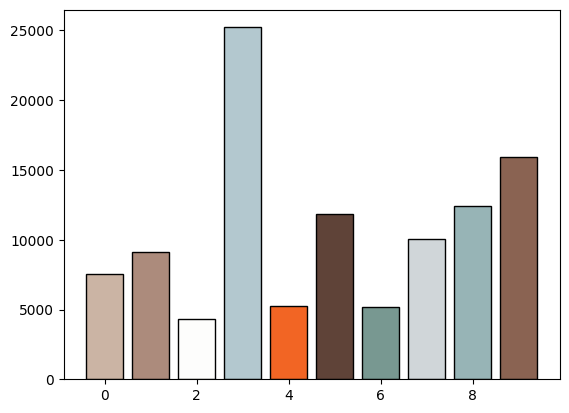

In [9]:
plot_labels(labels, clusters)

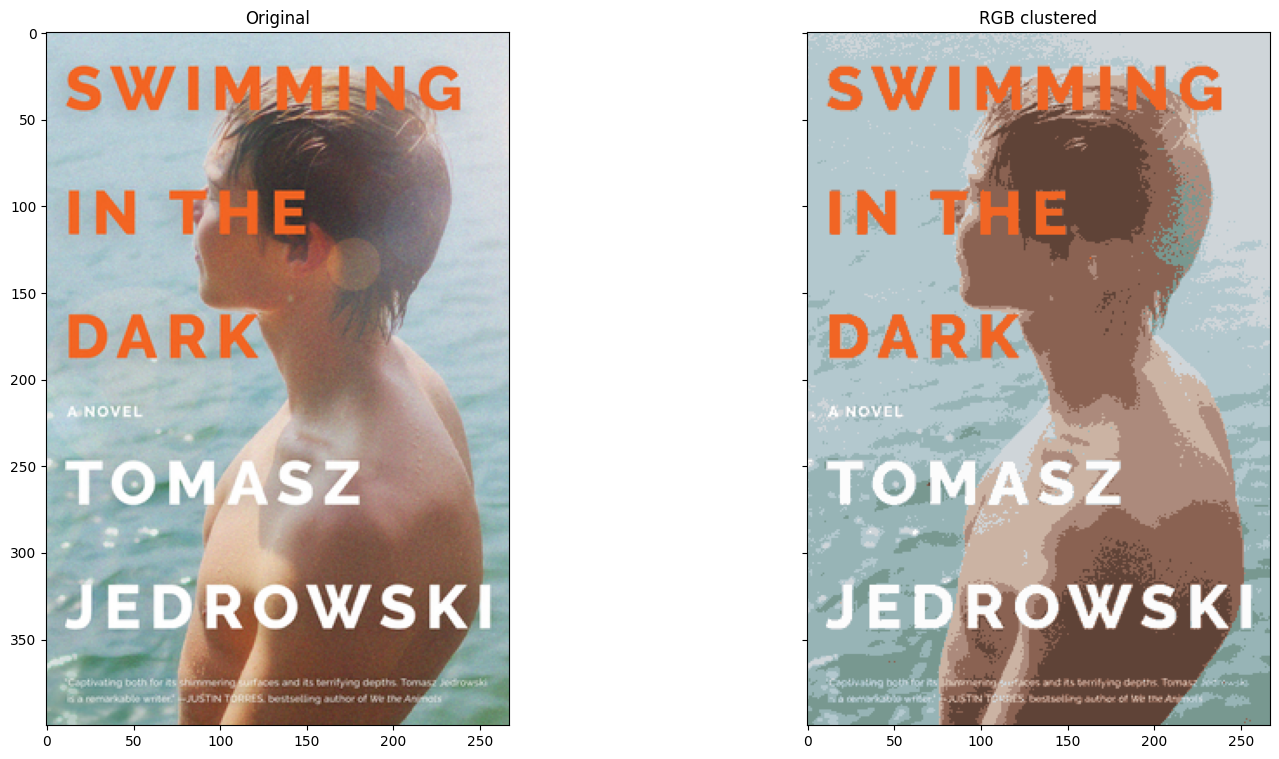

In [10]:
reduced = np.array([clusters[p] for p in labels]).reshape(original_shape)
plot_original_and_reduced_image(image, reduced)